In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a DataFrame
combined_season_data = pd.read_csv('combined_season_data.csv')

# Display the first few rows of the DataFrame
combined_season_data.head()

,Unnamed: 0,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HY,AY,HR,AR,HAGR,AAGR,HAGCR,AAGCR,NAGR,NAGCR
0,0,2002-2003,17/08/2002,Blackburn,Sunderland,0.0,0.0,D,0.0,0.0,...,1.0,2.0,0.0,0.0,0.882324,0.750135,0.990630,1.145987,0.816229,1.068309
1,1,2002-2003,17/08/2002,Charlton,Chelsea,2.0,3.0,A,2.0,1.0,...,0.0,3.0,1.0,0.0,0.861645,1.372106,1.167044,0.664697,1.116875,0.915870
2,2,2002-2003,17/08/2002,Everton,Tottenham,2.0,2.0,D,1.0,0.0,...,1.0,1.0,0.0,0.0,1.012637,1.217017,0.939149,0.914164,1.114827,0.926656
3,3,2002-2003,17/08/2002,Fulham,Bolton,4.0,1.0,H,3.0,1.0,...,1.0,2.0,0.0,0.0,0.896110,0.873021,1.133872,1.109798,0.884566,1.121835
4,4,2002-2003,17/08/2002,Leeds,Man City,3.0,0.0,H,2.0,0.0,...,1.0,1.0,0.0,0.0,0.847858,1.391492,1.384168,0.761530,1.119675,1.072849


### 1. Standard Deviation 

### Calculating WPCT (Win percentage), Standard deviation σL(WinPct), σL(NAGR), σL(NAGCR)

In [3]:
df = combined_season_data.copy()

# Calculate win percentage for each team for each game
df['HomeWin'] = (df['FTR'] == 'H').astype(int)
df['AwayWin'] = (df['FTR'] == 'A').astype(int)

# Calculating win percentages for home and away games separately
home_stats = df.groupby(['Season', 'HomeTeam']).agg(HomeGames=('HomeTeam', 'size'), HomeWins=('HomeWin', 'sum')).reset_index()
away_stats = df.groupby(['Season', 'AwayTeam']).agg(AwayGames=('AwayTeam', 'size'), AwayWins=('AwayWin', 'sum')).reset_index()

# Merging home and away statistics based on season and team
team_stats = pd.merge(home_stats, away_stats, left_on=['Season', 'HomeTeam'], right_on=['Season', 'AwayTeam'])

# Calculating total games played, total wins, and win percentage for each team for each season
team_stats['TotalGames'] = team_stats['HomeGames'] + team_stats['AwayGames']
team_stats['TotalWins'] = team_stats['HomeWins'] + team_stats['AwayWins']
team_stats['WPCT'] = team_stats['TotalWins'] / team_stats['TotalGames']

# Combine NAGR and NAGCR columns from the original dataframe
team_stats = pd.merge(team_stats, df[['Season', 'HomeTeam', 'NAGR', 'NAGCR']].drop_duplicates(), on=['Season', 'HomeTeam'])

# Calculate σL for all seasons
σL_WinPct = team_stats.groupby('Season')['WPCT'].std().reset_index().rename(columns={'WPCT': 'σL(WinPct)'})
σL_NAGR = team_stats.groupby('Season')['NAGR'].std().reset_index().rename(columns={'NAGR': 'σL(NAGR)'})
σL_NAGCR = team_stats.groupby('Season')['NAGCR'].std().reset_index().rename(columns={'NAGCR': 'σL(NAGCR)'})

# Merging the σL values for all metrics into one dataframe
sd_table = pd.merge(σL_WinPct, σL_NAGR, on='Season')
sd_table = pd.merge(sd_table, σL_NAGCR, on='Season')

sd_table


,Season,σL(WinPct),σL(NAGR),σL(NAGCR)
0,2002-2003,0.132410,0.164644,0.125930
1,2003-2004,0.137528,0.163753,0.121486
2,2004-2005,0.160175,0.170620,0.123074
3,2005-2006,0.164194,0.169418,0.115448
4,2006-2007,0.143822,0.174436,0.120851
5,2007-2008,0.168313,0.189433,0.167447
6,2008-2009,0.159910,0.173425,0.121550
7,2009-2010,0.165316,0.177736,0.121750
8,2010-2011,0.116502,0.168953,0.145590
9,2011-2012,0.161422,0.176329,0.136718


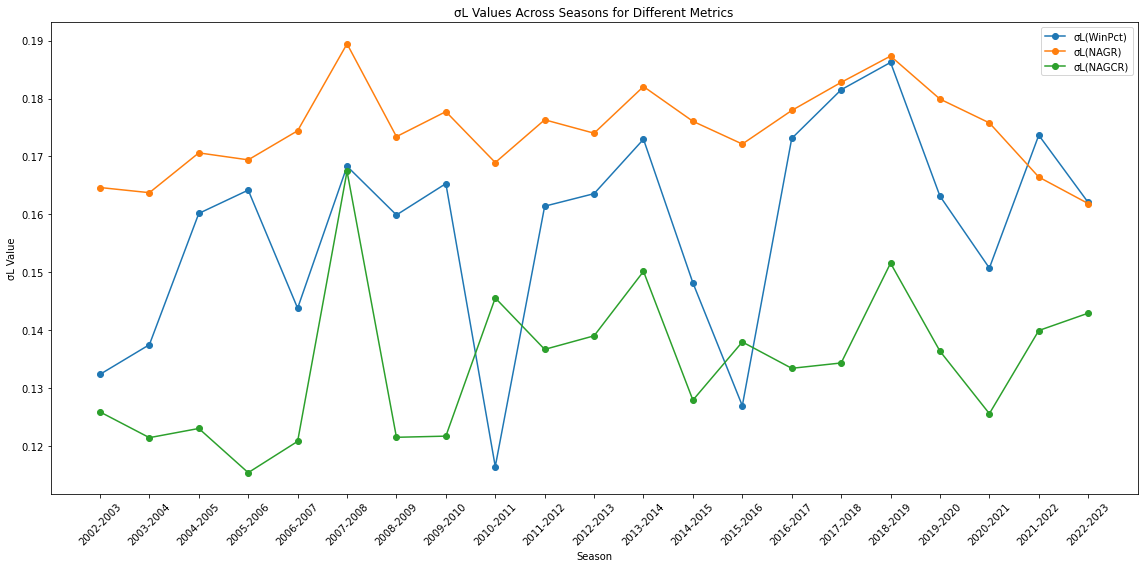

In [4]:
plt.figure(figsize=(16, 8))

# Plotting σL for each metric across seasons
plt.plot(sd_table['Season'], sd_table['σL(WinPct)'], label='σL(WinPct)', marker='o')
plt.plot(sd_table['Season'], sd_table['σL(NAGR)'], label='σL(NAGR)', marker='o')
plt.plot(sd_table['Season'], sd_table['σL(NAGCR)'], label='σL(NAGCR)', marker='o')

# Setting labels, title, and legend
plt.xlabel('Season')
plt.ylabel('σL Value')
plt.title('σL Values Across Seasons for Different Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Calculating Normalised Standard deviation σL*(WinPct), σL*(NAGR),  σL* (NAGCR)

In [5]:
# Calculating the upper bound for the actual observed standard deviation (ASD_ub) for each metric
# Using the maximum number of teams in the dataset as N for all calculations
N = max(team_stats.groupby('Season')['HomeTeam'].nunique())

ASD_ub = np.sqrt((N + 1) / (12 * (N - 1)))

# Calculating ASD* for each metric
ASD_star_WinPct = sd_table['σL(WinPct)'] / ASD_ub
ASD_star_NAGR = sd_table['σL(NAGR)'] / ASD_ub
ASD_star_NAGCR = sd_table['σL(NAGCR)'] / ASD_ub

# Adding the calculated values to the dataframe
sd_table['σL*(WinPct)'] = ASD_star_WinPct
sd_table['σL*(NAGR)'] = ASD_star_NAGR
sd_table['σL*(NAGCR)'] = ASD_star_NAGCR

# Keeping only the relevant columns for clarity
sd_normalized_table = sd_table[['Season', 'σL*(WinPct)', 'σL*(NAGR)', 'σL*(NAGCR)']]

sd_normalized_table


,Season,σL*(WinPct),σL*(NAGR),σL*(NAGCR)
0,2002-2003,0.436292,0.542504,0.414942
1,2003-2004,0.453158,0.539570,0.400300
2,2004-2005,0.527781,0.562196,0.405531
3,2005-2006,0.541023,0.558235,0.380404
4,2006-2007,0.473894,0.574770,0.398208
5,2007-2008,0.554596,0.624184,0.551739
6,2008-2009,0.526905,0.571439,0.400509
7,2009-2010,0.544721,0.585642,0.401170
8,2010-2011,0.383877,0.556704,0.479722
9,2011-2012,0.531889,0.581008,0.450488


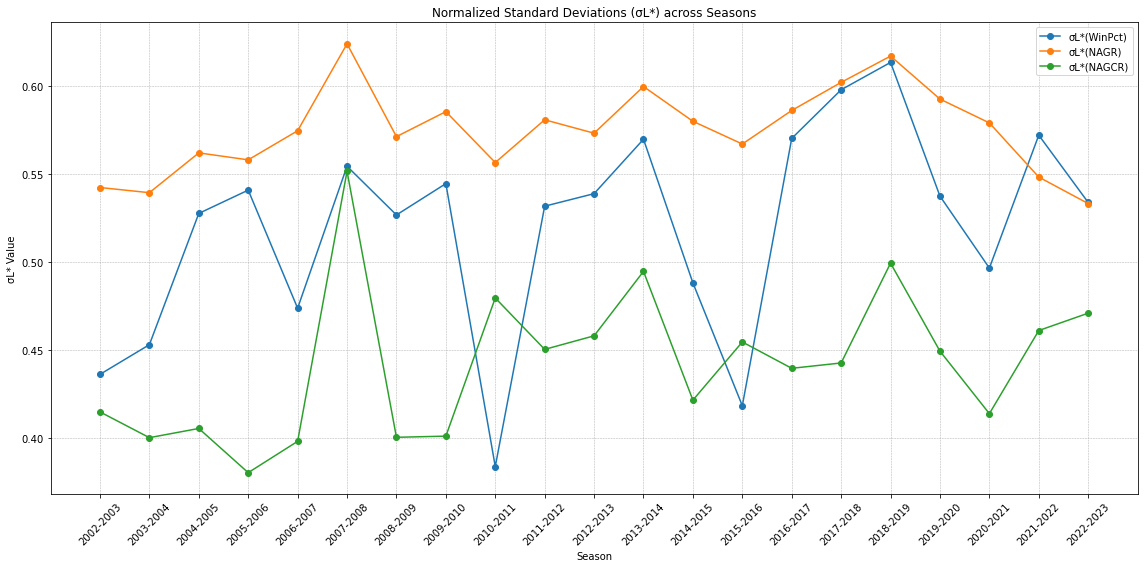

In [14]:
plt.figure(figsize=(16, 8))

# Plotting σL for each metric across seasons
plt.plot(sd_normalized_table['Season'], sd_normalized_table['σL*(WinPct)'], label='σL*(WinPct)', marker='o')
plt.plot(sd_normalized_table['Season'], sd_normalized_table['σL*(NAGR)'], label='σL*(NAGR)', marker='o')
plt.plot(sd_normalized_table['Season'], sd_normalized_table['σL*(NAGCR)'], label='σL*(NAGCR)', marker='o')

# Setting labels, title, and legend
plt.xlabel('Season')
plt.ylabel('σL* Value')
plt.title('Normalized Standard Deviations (σL*) across Seasons')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/NSD.pdf"
plt.savefig(file_path)

plt.show()


In [7]:
from sklearn.linear_model import LinearRegression

# 1. Most Competitive Year
least_competitive_year = sd_normalized_table['Season'][sd_normalized_table['σL*(WinPct)'].idxmax()]

# 2. Least Competitive Year
most_competitive_year = sd_normalized_table['Season'][sd_normalized_table['σL*(WinPct)'].idxmin()]


# 3. Current Trend of Competitiveness Balance
recent_years = 5  # Last 5 seasons
recent_trend = sd_normalized_table['σL*(WinPct)'].tail(recent_years).values
if recent_trend[-1] > recent_trend[0]:
    current_trend = "Increasing"
elif recent_trend[-1] < recent_trend[0]:
    current_trend = "Declining"
else:
    current_trend = "Stable"

# 4. Future Trend of Competitiveness Balance using linear regression
X = np.array(range(len(sd_normalized_table) - recent_years, len(sd_normalized_table))).reshape(-1, 1)
y = sd_normalized_table['σL*(WinPct)'].tail(recent_years).values
model = LinearRegression().fit(X, y)
predicted_value = model.predict([[len(sd_normalized_table)]])

if predicted_value > y[-1]:
    future_trend = "Increasing"
elif predicted_value < y[-1]:
    future_trend = "Declining"
else:
    future_trend = "Stable"

most_competitive_year, least_competitive_year, current_trend, future_trend


('2010-2011', '2018-2019', 'Declining', 'Declining')

### 2. CBR (Competitive Balance Ratio)

In [8]:
# Calculate within-season-standard deviation for each metric for each season
SDws_WinPct = team_stats.groupby('Season')['WPCT'].std()
SDws_NAGR = team_stats.groupby('Season')['NAGR'].std()
SDws_NAGCR = team_stats.groupby('Season')['NAGCR'].std()

# Calculate average win percentage for each team across all seasons
team_avg_WinPct = team_stats.groupby('HomeTeam')['WPCT'].mean()

# Calculate within-team-standard deviation for Win Percentage for each team
SDwt_WinPct = team_stats.groupby('HomeTeam')['WPCT'].apply(lambda x: ((x - team_avg_WinPct[x.name]) ** 2).sum() / len(x))

# Calculate average NAGR for each team across all seasons
team_avg_NAGR = team_stats.groupby('HomeTeam')['NAGR'].mean()

# Calculate within-team-standard deviation for NAGR for each team
SDwt_NAGR = team_stats.groupby('HomeTeam')['NAGR'].apply(lambda x: ((x - team_avg_NAGR[x.name]) ** 2).sum() / len(x))

# Calculate average NAGCR for each team across all seasons
team_avg_NAGCR = team_stats.groupby('HomeTeam')['NAGCR'].mean()

# Calculate within-team-standard deviation for NAGCR for each team
SDwt_NAGCR = team_stats.groupby('HomeTeam')['NAGCR'].apply(lambda x: ((x - team_avg_NAGCR[x.name]) ** 2).sum() / len(x))

# Calculate CBR for each season for each metric
CBR_WinPct = SDwt_WinPct.mean() / SDws_WinPct
CBR_NAGR = SDwt_NAGR.mean() / SDws_NAGR
CBR_NAGCR = SDwt_NAGCR.mean() / SDws_NAGCR

# Create a dataframe to store the results
cbr_per_season = pd.DataFrame({
    'Season': SDws_WinPct.index,
    'CBR(WinPct)': CBR_WinPct.values,
    'CBR(NAGR)': CBR_NAGR.values,
    'CBR(NAGCR)': CBR_NAGCR.values
})

cbr_per_season


,Season,CBR(WinPct),CBR(NAGR),CBR(NAGCR)
0,2002-2003,0.051596,0.102359,0.061124
1,2003-2004,0.049676,0.102915,0.063360
2,2004-2005,0.042652,0.098773,0.062543
3,2005-2006,0.041608,0.099474,0.066674
4,2006-2007,0.047502,0.096612,0.063693
5,2007-2008,0.040590,0.088964,0.045969
6,2008-2009,0.042723,0.097176,0.063327
7,2009-2010,0.041326,0.094819,0.063223
8,2010-2011,0.058641,0.099748,0.052870
9,2011-2012,0.042323,0.095575,0.056301


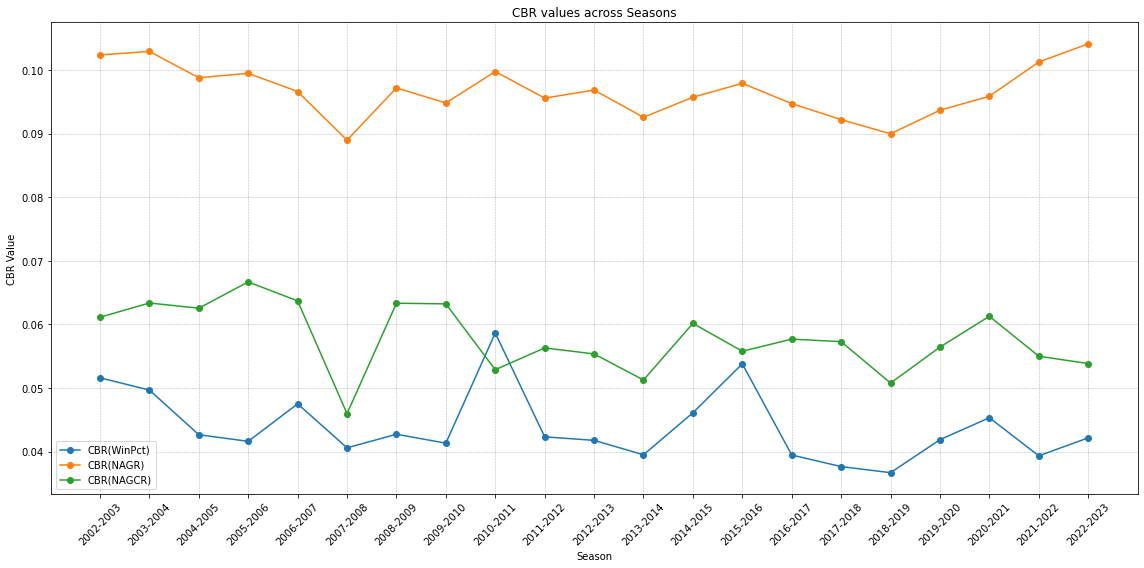

In [15]:
plt.figure(figsize=(16, 8))

# Plotting σL for each metric across seasons
plt.plot(cbr_per_season['Season'], cbr_per_season['CBR(WinPct)'], label='CBR(WinPct)', marker='o')
plt.plot(cbr_per_season['Season'], cbr_per_season['CBR(NAGR)'], label='CBR(NAGR)', marker='o')
plt.plot(cbr_per_season['Season'], cbr_per_season['CBR(NAGCR)'], label='CBR(NAGCR)', marker='o')

# Setting labels, title, and legend
plt.xlabel('Season')
plt.ylabel('CBR Value')
plt.title('CBR values across Seasons')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot as a PDF
file_path = "C:/Users/HP/Desktop/DissertationPrograms/Final_Work/Images/pdf/CBR.pdf"
plt.savefig(file_path)

plt.show()


In [17]:
# For CBR, a lower value indicates higher competitiveness.

# 1. Most Competitive Year
least_competitive_year_cbr = cbr_per_season['Season'][cbr_per_season['CBR(WinPct)'].idxmin()]

# 2. Least Competitive Year
most_competitive_year_cbr = cbr_per_season['Season'][cbr_per_season['CBR(WinPct)'].idxmax()]

# 3. Current Trend of Competitiveness Balance
recent_trend_cbr = cbr_per_season['CBR(WinPct)'].tail(recent_years).values
if recent_trend_cbr[-1] < recent_trend_cbr[0]:
    current_trend_cbr = "Increasing"
elif recent_trend_cbr[-1] > recent_trend_cbr[0]:
    current_trend_cbr = "Declining"
else:
    current_trend_cbr = "Stable"

# 4. Future Trend of Competitiveness Balance
X_cbr = np.array(range(len(cbr_per_season) - recent_years, len(cbr_per_season))).reshape(-1, 1)
y_cbr = cbr_per_season['CBR(WinPct)'].tail(recent_years).values
model_cbr = LinearRegression().fit(X_cbr, y_cbr)
predicted_value_cbr = model_cbr.predict([[len(cbr_per_season)]])

if predicted_value_cbr < y_cbr[-1]:
    future_trend_cbr = "Increasing"
elif predicted_value_cbr > y_cbr[-1]:
    future_trend_cbr = "Declining"
else:
    future_trend_cbr = "Stable"

most_competitive_year_cbr, least_competitive_year_cbr, current_trend_cbr, future_trend_cbr


('2010-2011', '2018-2019', 'Declining', 'Declining')